## 16 - Making a Basic Skew-T

Watch video: [YouTube](https://www.youtube.com/watch?v=oog6_b-844Q)

The **Skew-T Log-P diagram**, often abbreviated as **Skew-T plot**, is a graph used in meteorology to plot the temperature and dew point temperature for a vertical section of the atmosphere. It is used primarily for weather forecasting and to analyze air parcel ascent, such as in thunderstorm and tornado development.
  
The "Skew-T" part of the name refers to the temperature lines, which are skewed to the right, and the "Log-P" refers to the logarithmic scale used for pressure on the vertical axis. This allows for a large vertical extent to be displayed, which is necessary for depicting the atmosphere from the surface to the stratosphere.

In [1]:
import datetime
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import pandas_dataframe_to_unit_arrays
import metpy.plots as plots
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
date = datetime.datetime(2017, 9, 10)
df = WyomingUpperAir.request_data(date, 'BMX')
df = pandas_dataframe_to_unit_arrays(df)

In [3]:
p = df['pressure']
T = df['temperature']
Td = df['dewpoint']
u = df['u_wind']
v = df['v_wind']

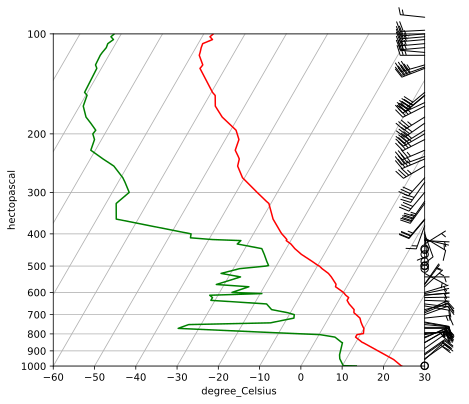

In [4]:
fig = plt.figure(1, figsize=(8, 6))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p, u, v)
plt.show()